In [114]:
import pandas as pd
import numpy as np
import seaborn as sns

PATH_READ = 'raw_train.csv'
PATH_WRITE = 'train_with_features_TB.csv'
# df = pd.read_csv(PATH_READ, index_col='Timestamp')
df = pd.read_csv(PATH_READ)


Preprocessing, cleaning unwanted cols

In [115]:
df = df.drop(['InstrumentID','TradingDay','PreClosePrice','UpdateTime'], axis=1)
# df.index = pd.to_datetime(df.index)

print(df.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close'], dtype='object')


Add hist return features

In [116]:
def hist_ret_close(df, param):
    return df['Close'] / df['Close'].shift(param)

df.insert(loc=df.columns.get_loc('Close')+1, column= 'Hist_Ret_Close_15min', value= hist_ret_close(df,15))
df.insert(loc=df.columns.get_loc('Close')+1, column= 'Hist_Ret_Close_10min', value= hist_ret_close(df,10))
df.insert(loc=df.columns.get_loc('Close')+1, column= 'Hist_Ret_Close_5min', value= hist_ret_close(df,5))
df.insert(loc=df.columns.get_loc('Close')+1, column= 'Hist_Ret_Close_3min', value= hist_ret_close(df,3))

print(df.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close',
       'Hist_Ret_Close_3min', 'Hist_Ret_Close_5min', 'Hist_Ret_Close_10min',
       'Hist_Ret_Close_15min'],
      dtype='object')


Add log return features

In [117]:
df['Log_Return_Close_1min'] = np.log(df['Close'] / df['Close'].shift(1))

print(df.columns)
print(df['Log_Return_Close_1min'])

Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close',
       'Hist_Ret_Close_3min', 'Hist_Ret_Close_5min', 'Hist_Ret_Close_10min',
       'Hist_Ret_Close_15min', 'Log_Return_Close_1min'],
      dtype='object')
0           NaN
1     -0.015623
2      0.024979
3      0.007725
4     -0.007563
         ...   
724   -0.001032
725    0.000000
726    0.000000
727    0.001754
728    0.000000
Name: Log_Return_Close_1min, Length: 729, dtype: float64


Add average price and mean price from 4

In [118]:
df['Avg Price'] = df['Turnover']/df['Volume']

# For unchanged prices, fill zero
df['Avg Price'].fillna(0, inplace=True)


df['4mean Price'] = (df['High']+df['Low']+df['Close']+df['Open'])/4.0


Add log return based on avg price

In [119]:
df['Log_Return_Avg_1min'] = np.log(df['Avg Price'] / df['Avg Price'].shift(1))

print(df.columns)
print(df['Log_Return_Avg_1min'])

Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close',
       'Hist_Ret_Close_3min', 'Hist_Ret_Close_5min', 'Hist_Ret_Close_10min',
       'Hist_Ret_Close_15min', 'Log_Return_Close_1min', 'Avg Price',
       '4mean Price', 'Log_Return_Avg_1min'],
      dtype='object')
0           NaN
1     -0.004298
2      0.005441
3      0.015268
4     -0.003514
         ...   
724    0.001320
725         NaN
726         NaN
727         NaN
728         NaN
Name: Log_Return_Avg_1min, Length: 729, dtype: float64


C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Hist based on avg price

In [120]:
def hist_ret_avg(df, param):
    return df['Avg Price'] / df['Avg Price'].shift(param)

df['Hist_Ret_Avg_3min'] = hist_ret_avg(df, 3)
df['Hist_Ret_Avg_5min'] = hist_ret_avg(df, 5)
df['Hist_Ret_Avg_10min'] = hist_ret_avg(df, 10)
df['Hist_Ret_Avg_15min'] = hist_ret_avg(df, 15)

Add targets based on close price

In [121]:
df['Target_Close_1min'] = (df['Close'].shift(-1) - df['Close'])/df['Close']

df['Target_Close_5min_Mean'] = (df['Close'].rolling(window=5).mean().shift(-5) - df['Close']) / df['Close']

df['Target_Close_10min_Mean'] = (df['Close'].rolling(window=10).mean().shift(-10) - df['Close']) / df['Close']

df['Target_Close_15min_Mean'] = (df['Close'].rolling(window=10).mean().shift(-15) - df['Close']) / df['Close']

Add targets based on avg price

In [122]:
df['Target_Avg_1min'] = (df['Avg Price'].shift(-1) - df['Avg Price'])/df['Avg Price']

df['Target_Avg_5min_Mean'] = (df['Avg Price'].rolling(window=5).mean().shift(-5) - df['Avg Price']) / df['Avg Price']

df['Target_Avg_10min_Mean'] = (df['Avg Price'].rolling(window=10).mean().shift(-10) - df['Avg Price']) / df['Avg Price']

df['Target_Avg_15min_Mean'] = (df['Avg Price'].rolling(window=10).mean().shift(-15) - df['Avg Price']) / df['Avg Price']

Experiment with rolling volatility

In [123]:
def rolling_std(df, window_size):
    return df['Close'].rolling(window=window_size).std()

df['Vol_5min_Close'] = rolling_std(df, 5)
df['Vol_10min_Close'] = rolling_std(df, 10)
df['Vol_15min_Close'] = rolling_std(df, 15)

print(df.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close',
       'Hist_Ret_Close_3min', 'Hist_Ret_Close_5min', 'Hist_Ret_Close_10min',
       'Hist_Ret_Close_15min', 'Log_Return_Close_1min', 'Avg Price',
       '4mean Price', 'Log_Return_Avg_1min', 'Hist_Ret_Avg_3min',
       'Hist_Ret_Avg_5min', 'Hist_Ret_Avg_10min', 'Hist_Ret_Avg_15min',
       'Target_Close_1min', 'Target_Close_5min_Mean',
       'Target_Close_10min_Mean', 'Target_Close_15min_Mean', 'Target_Avg_1min',
       'Target_Avg_5min_Mean', 'Target_Avg_10min_Mean',
       'Target_Avg_15min_Mean', 'Vol_5min_Close', 'Vol_10min_Close',
       'Vol_15min_Close'],
      dtype='object')


Sharpe on close price

In [124]:
risk_free_rate = 0

df['Sharpe_Log_ret_1min/Vol_5min_Close'] = (df['Log_Return_Close_1min'] - risk_free_rate) / df['Vol_5min_Close']
df['Sharpe_Log_ret_1min/Vol_10min_Close'] = (df['Log_Return_Close_1min'] - risk_free_rate) / df['Vol_10min_Close']
df['Sharpe_Log_ret_1min/Vol_15min_Close'] = (df['Log_Return_Close_1min'] - risk_free_rate) / df['Vol_15min_Close']


Add Triple Barrier Target

<Axes: >

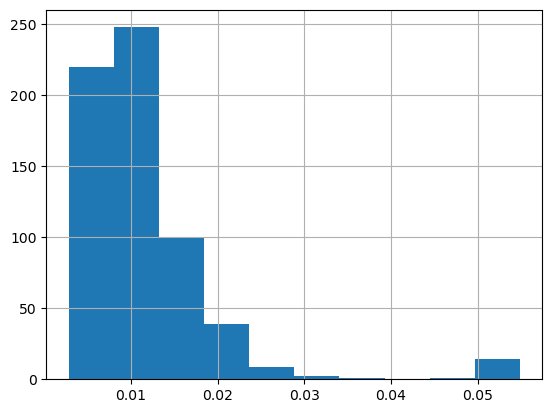

In [134]:
df['15min_range'] = df['High'].rolling(15).max() - df['Low'].rolling(15).min()
(df['15min_range'] /df['High']).hist()

In [125]:
def getDailyVol(data, span=30):
    df = data.assign(Return = lambda x: data['Close'] / data['Close'].shift(1)-1)
    sigma = df['Return'].ewm(span=span).std()
    return sigma

vol = getDailyVol(data=df)

In [126]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

events = df[['Timestamp']].copy(deep=True)
events['VB'] = df['Timestamp'] + pd.Timedelta(minutes=15)
events['Vol'] = vol

print(events)

              Timestamp                  VB       Vol
0   2023-06-21 09:26:00 2023-06-21 09:41:00       NaN
1   2023-06-21 09:31:00 2023-06-21 09:46:00       NaN
2   2023-06-21 09:32:00 2023-06-21 09:47:00  0.028847
3   2023-06-21 09:33:00 2023-06-21 09:48:00  0.020354
4   2023-06-21 09:34:00 2023-06-21 09:49:00  0.017893
..                  ...                 ...       ...
724 2023-06-27 14:58:00 2023-06-27 15:13:00  0.002023
725 2023-06-27 14:59:00 2023-06-27 15:14:00  0.002004
726 2023-06-27 15:00:00 2023-06-27 15:15:00  0.001984
727 2023-06-27 15:01:00 2023-06-27 15:16:00  0.001975
728 2023-06-27 15:35:00 2023-06-27 15:50:00  0.001956

[729 rows x 3 columns]


In [127]:
def TBL(df, events, width):
    
    res = events[['Timestamp', 'VB']].copy(deep=True)
    
    if width[0] > 0: events['UB'] = width[0]*events['Vol']
    else: events['UB'] = np.nan
        
    if width[1] > 0: events['DB'] = -width[1]*events['Vol']
    else: events['DB'] = np.nan
        
    for col,date,vb in res.itertuples():
        df0 = df[(df['Timestamp'] > date) & (df['Timestamp'] < vb)].copy(deep=True)
        df0['Return'] = df0['Close'] / df.loc[df['Timestamp'] == date, 'Close'].iloc[0]-1
        
        idx = (res['Timestamp'] == date)
        
        res.loc[idx, 'ut'] = df0.loc[df0['Return'] > events.loc[idx,'UB'].iloc[0], 'Timestamp'].min()
        res.loc[idx, 'dt'] = df0.loc[df0['Return'] < events.loc[idx,'DB'].iloc[0], 'Timestamp'].min()
            
    return res

In [128]:
def get_first_touch(df, events, width):
    res = TBL(df, events, width)
    res['First'] = res[['VB', 'ut', 'dt']].dropna(how='all').min(axis=1)
    return res

# 上下栅栏的宽度由 vol(span) * 系数[up,down] 决定
result = get_first_touch(df,events,width = [0.4,0.4])
print(result)

              Timestamp                  VB  ut                  dt  \
0   2023-06-21 09:26:00 2023-06-21 09:41:00 NaT                 NaT   
1   2023-06-21 09:31:00 2023-06-21 09:46:00 NaT                 NaT   
2   2023-06-21 09:32:00 2023-06-21 09:47:00 NaT                 NaT   
3   2023-06-21 09:33:00 2023-06-21 09:48:00 NaT 2023-06-21 09:47:00   
4   2023-06-21 09:34:00 2023-06-21 09:49:00 NaT 2023-06-21 09:48:00   
..                  ...                 ...  ..                 ...   
724 2023-06-27 14:58:00 2023-06-27 15:13:00 NaT                 NaT   
725 2023-06-27 14:59:00 2023-06-27 15:14:00 NaT                 NaT   
726 2023-06-27 15:00:00 2023-06-27 15:15:00 NaT                 NaT   
727 2023-06-27 15:01:00 2023-06-27 15:16:00 NaT                 NaT   
728 2023-06-27 15:35:00 2023-06-27 15:50:00 NaT                 NaT   

                  First  
0   2023-06-21 09:41:00  
1   2023-06-21 09:46:00  
2   2023-06-21 09:47:00  
3   2023-06-21 09:47:00  
4   2023-06-21 09

In [129]:
def get_label(df,result):
    result = result.dropna(subset=['First'])
    outcome = result[['Timestamp']].copy(deep=True)
    
    price_t0 = pd.merge(result,df,on=['Timestamp'],how='left')['Close']
    price_t1 = pd.merge(result,df,left_on=['First'], right_on=['Timestamp'], how = 'left')['Close']
    
    outcome['Return'] = price_t1/price_t0-1
    outcome['TB_15min_Label'] = np.sign(outcome['Return'].dropna())
    
    outcome = outcome.drop(['Return'], axis = 1)

    return outcome

outcome = get_label(df,result)
print(outcome)

df = pd.merge(df,outcome, on=['Timestamp'],how='inner')

              Timestamp  TB_15min_Label
0   2023-06-21 09:26:00            -1.0
1   2023-06-21 09:31:00             1.0
2   2023-06-21 09:32:00            -1.0
3   2023-06-21 09:33:00            -1.0
4   2023-06-21 09:34:00            -1.0
..                  ...             ...
724 2023-06-27 14:58:00             NaN
725 2023-06-27 14:59:00             NaN
726 2023-06-27 15:00:00             NaN
727 2023-06-27 15:01:00             NaN
728 2023-06-27 15:35:00             NaN

[729 rows x 2 columns]


Cleaning NaN and unwanted data

In [130]:
print(df.shape)

df.index = df['Timestamp']
df = df.drop(['Timestamp'], axis=1)

df = df[(df['Target_Close_1min'] != 0)
                      & (df['Target_Close_5min_Mean'] != 0)
                      & (df['Target_Close_10min_Mean'] != 0)
                      & (df['Target_Close_15min_Mean'] != 0)
                     ]
pd.set_option ('mode.use_inf_as_na', True)
df = df.dropna()

print(df)

(729, 34)
                        Open     High      Low  Volume     Turnover    Close  \
Timestamp                                                                      
2023-06-21 09:45:00  325.416  325.416  324.244   44726  14534416.33  324.340   
2023-06-21 09:46:00  324.200  324.200  323.000   37280  12061931.19  324.000   
2023-06-21 09:47:00  324.025  324.025  323.033   25290   8180562.04  323.273   
2023-06-21 09:48:00  322.933  322.933  321.000   47670  15338315.83  322.000   
2023-06-21 09:49:00  321.819  323.653  321.809   38780  12523104.37  323.209   
...                      ...      ...      ...     ...          ...      ...   
2023-06-27 14:43:00  319.878  320.880  319.780   28910   9266188.65  320.880   
2023-06-27 14:44:00  320.491  321.132  320.400   45330  14541863.93  321.132   
2023-06-27 14:45:00  321.400  322.229  321.307   76080  24486139.04  321.750   
2023-06-27 14:46:00  321.971  321.971  321.100   29700   9550888.62  321.220   
2023-06-27 14:47:00  321.299  

Saving CSV

In [131]:
df.to_csv(PATH_WRITE)